In [ ]:
# EfficentNet : 2019  Google Brain
# 기존 모델보다 파마메터소를 줄이고 더 정확도를 높임
# 기존 CNN
    # 깊이 : ResNet (50 -> 101)
    # 너비 : WideResnet 각 층의 채녈수를 늘린다
    # 해상도 : 224 -> 331
# 깊이 너비 해상도 --> 비율로 동시에 확장
# BaseLine  MBConv

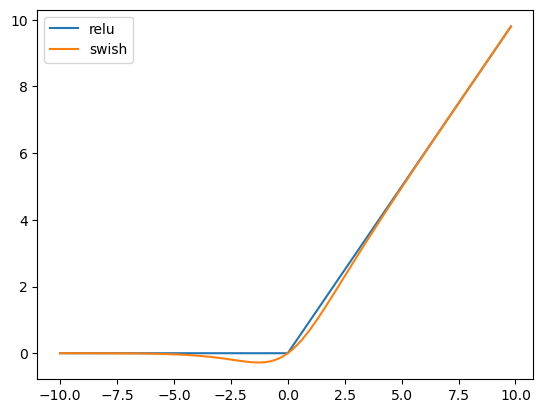

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # 시그모이드 함수와 동일
# -10 ~ 10까지 0.2간격
x = np.arange(-10,10,0.2)

# ReLU함수
# x.clip(0)  0보다 작으면 0 0보다크면 x자신으로 만듦
plt.plot(x, x.clip(0), label = 'relu')

# Swish 함수
plt.plot(x, x*expit(x), label='swish' )
plt.legend()
plt.show()

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from tqdm import tqdm  # 학습진행률 표시

In [7]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4,0.4,0.4),(0.2,0.2,0.2))
])
# 이미지 데이터 로드
trainset = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
model = models.efficientnet_b0(weights=True)

Files already downloaded and verified
Files already downloaded and verified


c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\playdata2/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 68.4MB/s]


In [8]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [13]:
model.classifier[1] = nn.Linear( model.classifier[1].in_features , 10)

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# 손실함수 옵티마이져
criterion = nn.CrossEntropyLoss()
# 기존모델의 가중치 + 사용자의 데이터로 학습 --> fine turnning  
optimizer = optim.Adam(model.parameters(),lr=1e-4)
for epoch in range(5):
    batch_loss = 0
    for i ,data in enumerate(tqdm(trainloader)):
        optimizer.zero_grad()
        inputs, labels =  data[0].to(device), data[1].to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()
    print(f'epoch : {epoch+1} loss :{batch_loss / len(trainloader)}')



  0%|          | 0/782 [00:14<?, ?it/s]


KeyboardInterrupt: 